In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dfn3share.csv')
df.head()

,Unnamed: 0,user,service,count,subcat,gender
0,0,3646,92,127,15,1
1,1,3646,94,18,15,1
2,2,3646,93,19,15,1
3,3,3646,95,2,17,1
4,4,3646,114,1,15,1


In [4]:
# find the top 20 subcat that most used
title =df.groupby(['subcat'])['count'].count().sort_values(ascending=False)
title=title.to_frame().head(20)
title


,count
subcat,
0,181505
15,144173
11,77554
1,77141
16,64847
9,63934
4,54430
5,40383
80,39920


In [5]:
# محاسبه ۲۰ تا سرویس برتر بر اساس کتگوری
title =df.groupby(['subcat','service'])['count'].count().sort_values(ascending=False)
title=title.to_frame().head(20)
title

,,count
subcat,service,
15,92,108566
80,20,39640
11,139,27932
0,0,26916
4,42,24071
15,94,21523
71,98,19056
5,46,17031
1,155,16864


Text(0, 0.5, 'Item count')

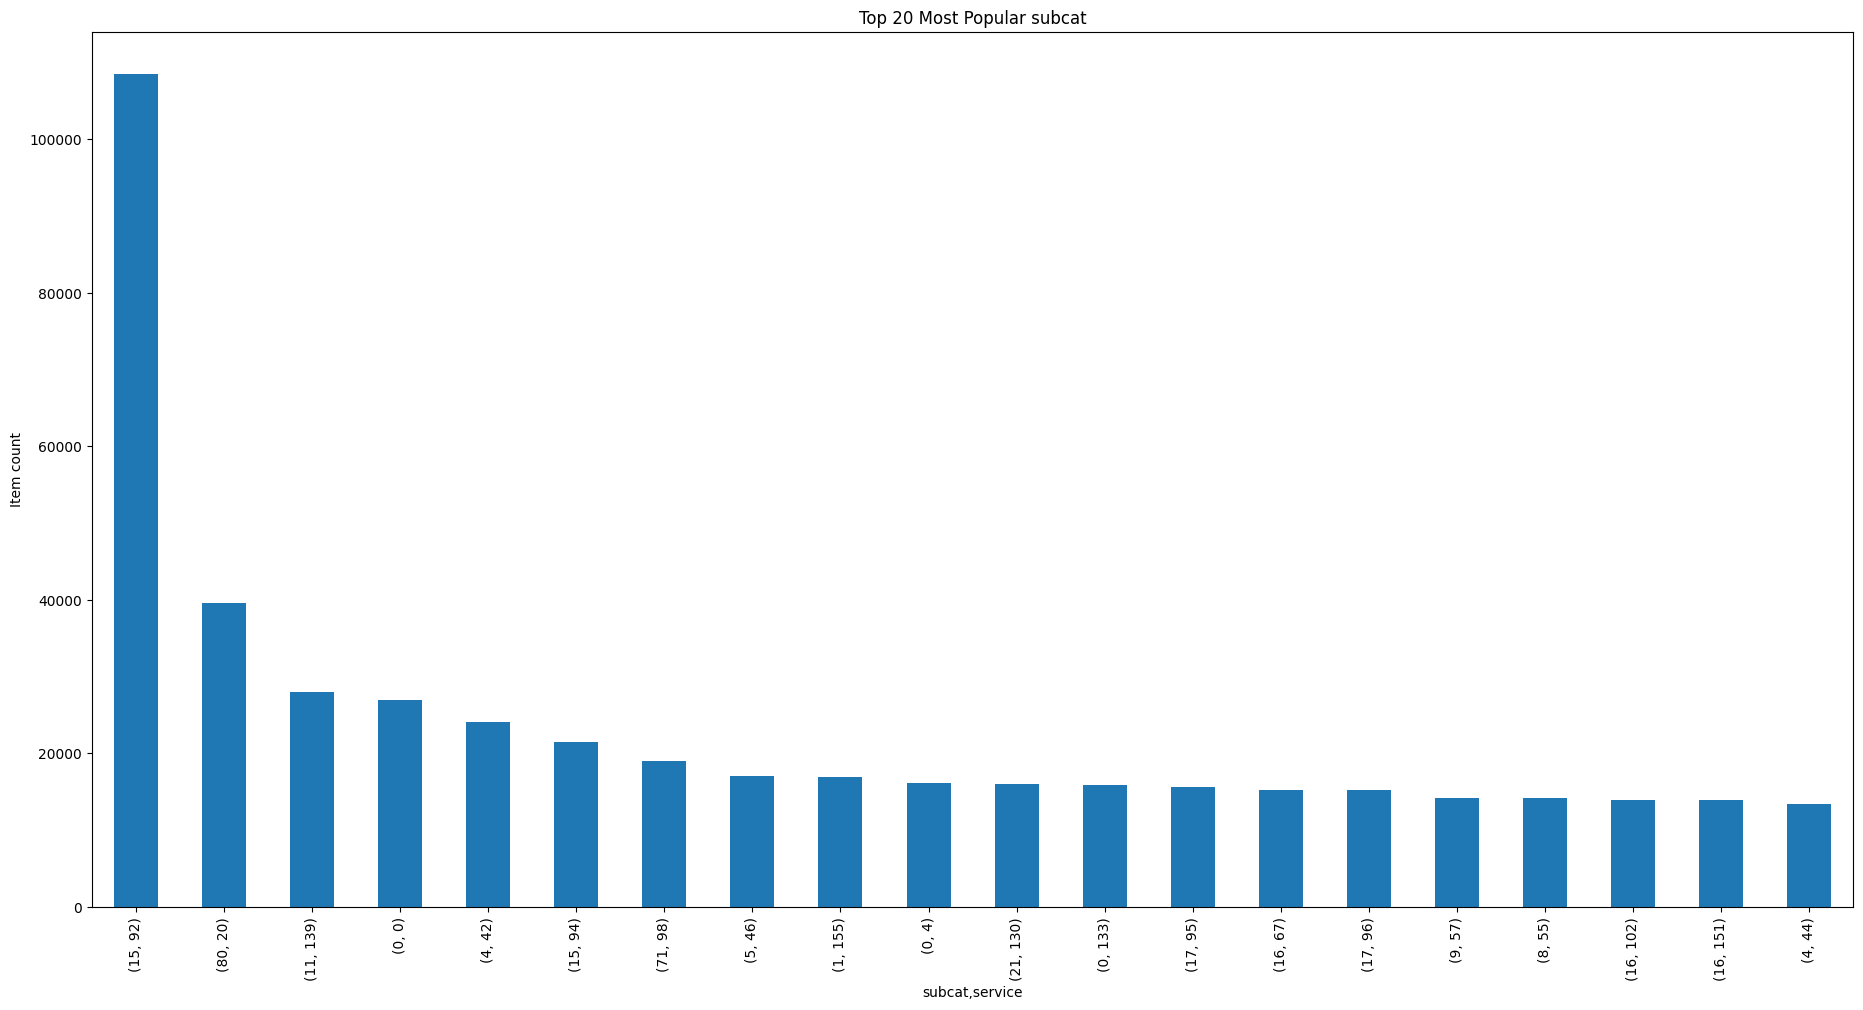

In [6]:
fig = plt.figure(figsize=(50, 25))
a1 = fig.add_subplot(221)
f1 = title.plot(kind='bar', title='Top 20 Most Popular subcat', legend=False, ax=a1)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

### Corrwith method

پیدا کردن کتگوری ها بر اساس آیتم بیس

In [7]:

user = df.groupby('user')['subcat'].count()

subcat_more20 = user[user >1].index.to_list()
df_subcat = df[df['user'].isin(subcat_more20)].reset_index(drop=True)


In [8]:
matrix1 = df_subcat.pivot_table(index=['user'], columns='subcat', values='count').fillna(0)
matrix1



subcat,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,76,77,80
user,,,,,,,,,,,,,,,,,,,,,
0,2.166667,1.500000,0.0,0.0,1.333333,1.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,3.0
1,2.166667,1.571429,1.0,1.0,1.000000,3.0,2.0,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.0,0.0,9.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513956,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1513958,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1513989,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Find the similarity of subcat's
Subcat=matrix1[15]

In [10]:
Undo_music1=pd.DataFrame(matrix1.corrwith(Subcat),columns=['correlations']).sort_values(by=['correlations'],ascending=False)
Undo_music1.head(10)

,correlations
subcat,
15,1.000000
17,0.117203
5,0.087257
22,0.081861
69,0.049200
3,0.046962
80,0.042240
38,0.041918
76,0.040001


In [11]:
user1 = df.groupby('user')['service'].count()

subcat_more1 = user[user1 >1].index.to_list()
df_subcat1 = df[df['user'].isin(subcat_more1)].reset_index(drop=True)


In [12]:
matrix2 = df_subcat1.pivot_table(index=['user'], columns='service', values='count').fillna(0)
matrix2

service,0,1,2,3,4,5,6,7,8,9,...,555,560,562,568,580,581,583,585,586,588
user,,,,,,,,,,,,,,,,,,,,,
0,3.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1513958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1513989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Find the similarity of services
service=matrix2[92]

In [14]:
Undo_music2=pd.DataFrame(matrix2.corrwith(service),columns=['correlations']).sort_values(by=['correlations'],ascending=False)
Undo_music2.head(10)


,correlations
service,
92,1.000000
94,0.163075
93,0.138933
96,0.114903
148,0.088574
147,0.086845
95,0.085642
46,0.062013
82,0.057330


## User_based collaborative and make sparse matrix

In [4]:
user_service_list = df[['user','count']].groupby('user').sum().reset_index()
user_service_list.rename(columns={'count':'total_use'},inplace=True)
merged = pd.merge(df,user_service_list).sort_values(by='total_use',ascending=False)
merged=merged[merged['count']>0]

In [5]:
merged.head()

,Unnamed: 0,user,service,count,subcat,gender,total_use
19656,19656,35405,93,5,15,1,237
19678,19678,35405,102,1,16,1,237
19676,19676,35405,133,6,0,1,237
19675,19675,35405,24,10,1,1,237
19674,19674,35405,0,4,0,1,237


In [6]:
# Find all the services that used by user==35405
merged.loc[merged['user']==35405]

,Unnamed: 0,user,service,count,subcat,gender,total_use
19656,19656,35405,93,5,15,1,237
19678,19678,35405,102,1,16,1,237
19676,19676,35405,133,6,0,1,237
19675,19675,35405,24,10,1,1,237
19674,19674,35405,0,4,0,1,237
19673,19673,35405,19,8,11,1,237
19672,19672,35405,115,3,2,1,237
19671,19671,35405,77,3,23,1,237
19670,19670,35405,80,1,6,1,237
19669,19669,35405,4,13,0,1,237


در واقع امتیاز استفاده هر یوزر از هر سرویس محاسبه شده است به عنوان مثال یوز ۳۶۴۶ حدود ۷۶ درصد از سرویس ۹۲ استفاده کرده و بقیه درصد ها از سرویس های دیگه استفاده کرده


In [7]:
merged['score'] =merged['count']/merged['total_use']
merged.sort_values(by='count',ascending=False)

,Unnamed: 0,user,service,count,subcat,gender,total_use,score
0,0,3646,92,127,15,1,167,0.760479
5,5,690214,92,109,15,2,111,0.981982
7,7,78178,92,109,15,2,118,0.923729
359773,359773,279047,252,107,27,1,125,0.856000
14,14,469578,92,102,15,1,106,0.962264
...,...,...,...,...,...,...,...,...
1002264,1002264,915218,341,1,68,2,5,0.200000
552114,552114,337770,334,1,67,2,5,0.200000
552112,552112,337770,96,1,17,2,5,0.200000
552111,552111,337770,164,1,36,2,5,0.200000


In [9]:
merged.loc[merged['user']==3646]

,Unnamed: 0,user,service,count,subcat,gender,total_use,score
1,1,3646,94,18,15,1,167,0.107784
0,0,3646,92,127,15,1,167,0.760479
4,4,3646,114,1,15,1,167,0.005988
3,3,3646,95,2,17,1,167,0.011976
2,2,3646,93,19,15,1,167,0.113772


In [19]:
user_codes = merged.user.drop_duplicates().reset_index()
user_codes.rename(columns={'index':'user_index'}, inplace=True)
user_codes['user_idx'] = list(user_codes.index)

In [20]:
service_codes =merged.drop_duplicates().reset_index()
service_codes.rename(columns={'index':'service_idx'}, inplace=True)
service_codes['service_idx'] = list(service_codes.index)

In [28]:


new_set = pd.merge(merged,service_codes,how='left')
new_set = pd.merge(new_set,user_codes,how='left')
final = new_set[['user_idx','service_idx','score']]
final=final[:1000]


In [52]:
final.head(60)

,user_idx,service_idx,score
0,0,0,0.021097
1,0,1,0.004219
2,0,2,0.025316
3,0,3,0.042194
4,0,4,0.016878
5,0,5,0.033755
6,0,6,0.012658
7,0,7,0.012658
8,0,8,0.004219
9,0,9,0.054852


In [30]:
from scipy.sparse.linalg import svds
import math as mt
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import *
from scipy.sparse import coo_matrix

In [31]:
data_array = final.score.values
row_array = final.user_idx.values
col_array =final.service_idx.values
data_sparse = coo_matrix((data_array, (row_array, col_array)),dtype=float)


In [32]:
def compute_svd(urm, K):
    U, s, Vt = svds(urm, K)

    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])

    U = csc_matrix(U, dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

In [33]:
def compute_estimated_matrix(urm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt 
    estimatedRatings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :]*rightTerm
        estimatedRatings[userTest, :] = prod.todense()
        recomendRatings = (-estimatedRatings[userTest, :]).argsort()[:250]
    return recomendRatings[1:]

In [58]:
K=5
urm = data_sparse
MAX_PID = urm.shape[1]
MAX_UID = urm.shape[0]

U, S, Vt = compute_svd(urm, K)
uTest = [1]

recommended_service = compute_estimated_matrix(urm, U, S, Vt, uTest, K, True)

In [61]:
print(f"The top five recommended song for user {new_set['user_idx'][78]} is:")
for idx in recommended_service[:6]:
    for i,j in enumerate(new_set['service_idx']):
        # print(j)
        if idx==j:
            print( new_set['subcat'][idx])
            break
        

The top five recommended song for user 1 is:
38
68
41
38
36
68
